In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os, re, time, json
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import numpy as np
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds

# Assign training and validation set directories
base_dir = '/home/kevinhardin/PollenCounter/BeeDataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# TRAIN
# Directory with training cooling pictures
train_cooling_dir = os.path.join(train_dir, 'Cooling')

# Directory with training none pictures
train_none_dir = os.path.join(train_dir, 'None')

# Directory with training pollen pictures
train_pollen_dir = os.path.join(train_dir, 'Pollen')

# Directory with training varroa pictures
train_varroa_dir = os.path.join(train_dir, 'Varroa')

# Directory with training wasps pictures
train_wasps_dir = os.path.join(train_dir, 'Wasps')

# VALIDATION
# Directory with validation cooling pictures
validation_cooling_dir = os.path.join(validation_dir, 'Cooling')

# Directory with validation none pictures
validation_none_dir = os.path.join(validation_dir, 'None')

# Directory with validation pollen pictures
validation_pollen_dir = os.path.join(validation_dir, 'Pollen')

# Directory with validation varroa pictures
validation_varroa_dir = os.path.join(validation_dir, 'Varroa')

# Directory with validation wasps pictures
validation_wasps_dir = os.path.join(validation_dir, 'Wasps')

print("Done")

Done


['m9Op48TNxbcBKyBQPShWtFqzQaabIhHy.jpeg', 'tT2LxhENx4qaM6wj6EWg7HcvOtXbSRBL.jpeg', 'zgnbNzlLfTuncmxi1UqvFpIkM5vUhNdJ.jpeg', 'pe6WKGZmDSgbl2YpWgGKVo5hapxTD0vO.jpeg', 'kG6S9I9pHAYi3VtH4CLNYUbDVbn9XaTV.jpeg', 'tGgCqMkZ7RfTZ0xnEyikoDxbvYBhPxRB.jpeg', 'nCJCbB2NeNfLXjW7EdzDUcnkd8RbHZEp.jpeg', 'UibIZ8iENZKu0yOruXS3qHHh1kABT8Jd.jpeg', 'T5QsaZL3ZcbAaFv9S95I1q8MO1Xc3yoi.jpeg', 'hrOPd86sjpyhcfz2elf8K9cUhsoi4Blp.jpeg']
['FF8fL1s8tepZbgcmEL6biryB4hq8jxxs.jpeg', 'RuXyK21mFapVb8f94hH26EpIWqJDgNYk.jpeg', 'JUgm6YM4z0q12BVfUOJFSNr11wdSuXzh.jpeg', 'ZtNGDBWU3XVfuB2UW7Wz6h5fo95pbkng.jpeg', 'fKCWXMzB961us90H8XVWNkXGczVnpS4i.jpeg', 'gGxCk7TaXGNSjDUbWaB8WPwYZLJTQEw3.jpeg', 'yVeP0V8iY0u7XWRAILmIfDsD8UlUM2lx.jpeg', 'YCYu58jIHOXvAXFI6GIxdEKM3R9HTeOm.jpeg', 'cPZpvhwT1Dy60C9bVWumCJ2zgbsikRz4.jpeg', 'QDq3JhUsBKWQV4EwMJjqxzofOhYDned6.jpeg']
['YTIM8qhUoHc4uhggdAFzunfENhAgLOUb.jpeg', 'RJo1HtYUKITP8TRqG2npTFINcG9YzMSR.jpeg', 'kG6S9I9pHAYi3VtH4CLNYUbDVbn9XaTV.jpeg', 'Kk21HkmhisHNCJVBuJQPlTWpgtlMDUy5.jpeg', 'sDoGkzXXU8wo

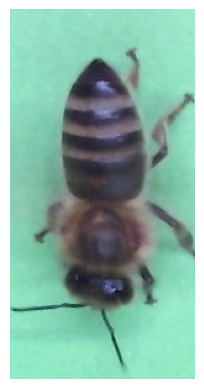

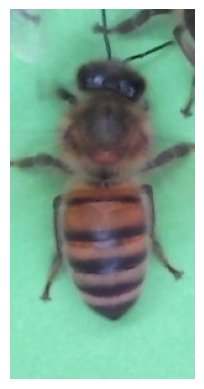

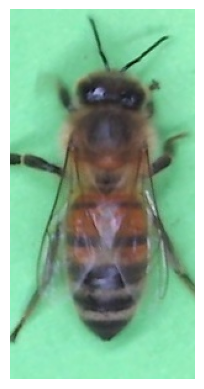

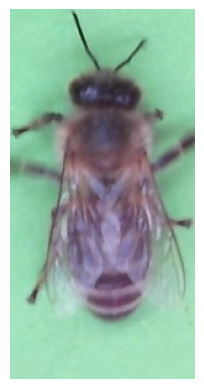

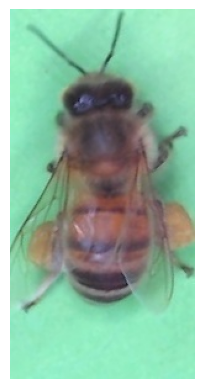

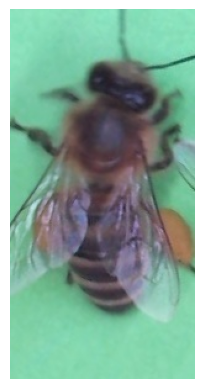

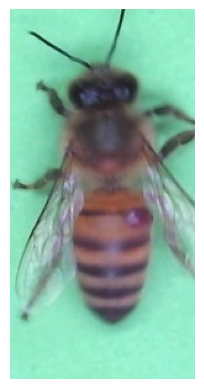

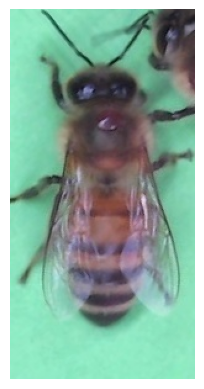

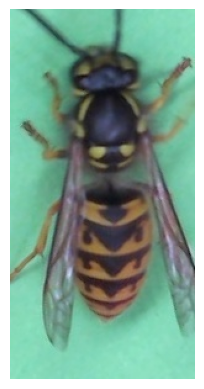

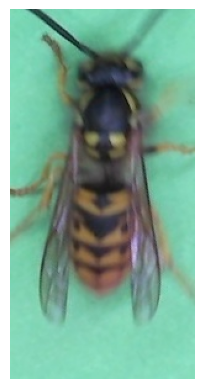

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cooling_files = os.listdir(train_cooling_dir)
print(cooling_files[:10])

none_files = os.listdir(train_none_dir)
print(none_files[:10])

pollen_files = os.listdir(train_pollen_dir)
print(pollen_files[:10])

varroa_files = os.listdir(train_varroa_dir)
print(varroa_files[:10])

wasps_files = os.listdir(train_wasps_dir)
print(wasps_files[:10])

pic_index = 2

next_cooling = [os.path.join(train_cooling_dir, fname) 
                for fname in cooling_files[pic_index-2:pic_index]]
next_none = [os.path.join(train_none_dir, fname) 
                for fname in none_files[pic_index-2:pic_index]]
next_pollen = [os.path.join(train_pollen_dir, fname) 
                for fname in pollen_files[pic_index-2:pic_index]]
next_varroa = [os.path.join(train_varroa_dir, fname) 
                for fname in varroa_files[pic_index-2:pic_index]]
next_wasps = [os.path.join(train_wasps_dir, fname) 
                for fname in wasps_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_cooling+next_none+next_pollen+next_varroa+next_wasps):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(75, 75, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 73, 73, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 7, 7, 128)        

## Data augmentation

One simple method to avoid overfitting is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if you tweak with the images a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy!

Take a look at the [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) which you have been using to rescale the image. There are other properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

These are just a few of the options available. Let's quickly go over it:

* `rotation_range` is a value in degrees (0–180) within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Run the next cells to see the impact on the results. The code is similar to the baseline but the definition of `train_datagen` has been updated to use the parameters described above.


In [11]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Define a constant for the number of epochs
EPOCHS = 50

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(75, 75),  # All images will be resized to 75x75
        batch_size=64,
        class_mode='categorical')

# Flow validation images in batches of 16 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(75, 75),
        batch_size=64,
        class_mode='categorical')

# Train the new model
history = model.fit(
      train_generator,
      steps_per_epoch=89,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=29,  # 1000 images = batch_size * steps
      verbose=2)

Found 5735 images belonging to 5 classes.
Found 1915 images belonging to 5 classes.
Epoch 1/50
89/89 - 218s - loss: 1.5372 - accuracy: 0.4221 - val_loss: 1.4403 - val_accuracy: 0.4251 - 218s/epoch - 2s/step
Epoch 2/50
89/89 - 219s - loss: 1.3829 - accuracy: 0.4449 - val_loss: 1.1300 - val_accuracy: 0.5291 - 219s/epoch - 2s/step
Epoch 3/50
89/89 - 217s - loss: 1.2563 - accuracy: 0.5026 - val_loss: 1.0251 - val_accuracy: 0.5609 - 217s/epoch - 2s/step
Epoch 4/50
89/89 - 240s - loss: 1.1586 - accuracy: 0.5285 - val_loss: 1.0184 - val_accuracy: 0.5609 - 240s/epoch - 3s/step
Epoch 5/50
89/89 - 220s - loss: 1.1310 - accuracy: 0.5459 - val_loss: 0.8827 - val_accuracy: 0.6202 - 220s/epoch - 2s/step
Epoch 6/50
89/89 - 218s - loss: 1.0620 - accuracy: 0.5637 - val_loss: 1.0228 - val_accuracy: 0.5377 - 218s/epoch - 2s/step
Epoch 7/50
89/89 - 230s - loss: 1.0126 - accuracy: 0.5819 - val_loss: 0.8647 - val_accuracy: 0.6223 - 230s/epoch - 3s/step
Epoch 8/50
89/89 - 242s - loss: 0.9929 - accuracy: 0.59

KeyboardInterrupt: 

# ResNet Model

In [ ]:
# Download the checkpoint and put it into models/research/object_detection/test_data/

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

In [ ]:
tf.keras.backend.clear_session()

print('Building model and restoring weights for fine-tuning...', flush=True)
num_classes = 1
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

# Load pipeline config and build a detection model.
#
# Since we are working off of a COCO architecture which predicts 90
# class slots by default, we override the `num_classes` field here to be just
# one (for our new rubber ducky class).
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(
      model_config=model_config, is_training=True)

# Set up object-based checkpoint restore --- RetinaNet has two prediction
# `heads` --- one for classification, the other for box regression.  We will
# restore the box regression head but initialize the classification head
# from scratch (we show the omission below by commenting out the line that
# we would add if we wanted to restore both heads)
fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    # _prediction_heads=detection_model._box_predictor._prediction_heads,
    #    (i.e., the classification head that we *will not* restore)
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
fake_model = tf.compat.v2.train.Checkpoint(
          _feature_extractor=detection_model._feature_extractor,
          _box_predictor=fake_box_predictor)
ckpt = tf.compat.v2.train.Checkpoint(model=fake_model)
ckpt.restore(checkpoint_path).expect_partial()

# Run model through a dummy image so that variables are created
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))
prediction_dict = detection_model.predict(image, shapes)
_ = detection_model.postprocess(prediction_dict, shapes)
print('Weights restored!')

# Eager mode custom training loop



In [ ]:
tf.keras.backend.set_learning_phase(True)

# These parameters can be tuned; since our training set has 5 images
# it doesn't make sense to have a much larger batch size, though we could
# fit more examples in memory if we wanted to.
batch_size = 4
learning_rate = 0.01
num_batches = 100

# Select variables in top layers to fine-tune.
trainable_variables = detection_model.trainable_variables
to_fine_tune = []
prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead']
for var in trainable_variables:
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    to_fine_tune.append(var)

# Set up forward + backward pass for a single train step.
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):
  """Get a tf.function for training step."""

  # Use tf.function for a bit of speed.
  # Comment out the tf.function decorator if you want the inside of the
  # function to run eagerly.
  @tf.function
  def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
    """A single training iteration.

    Args:
      image_tensors: A list of [1, height, width, 3] Tensor of type tf.float32.
        Note that the height and width can vary across images, as they are
        reshaped within this function to be 640x640.
      groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
        tf.float32 representing groundtruth boxes for each image in the batch.
      groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
        with type tf.float32 representing groundtruth boxes for each image in
        the batch.

    Returns:
      A scalar tensor representing the total loss for the input batch.
    """
    shapes = tf.constant(batch_size * [[640, 640, 3]], dtype=tf.int32)
    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list)
    with tf.GradientTape() as tape:
      preprocessed_images = tf.concat(
          [detection_model.preprocess(image_tensor)[0]
           for image_tensor in image_tensors], axis=0)
      prediction_dict = model.predict(preprocessed_images, shapes)
      losses_dict = model.loss(prediction_dict, shapes)
      total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']
      gradients = tape.gradient(total_loss, vars_to_fine_tune)
      optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))
    return total_loss

  return train_step_fn

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
train_step_fn = get_model_train_step_function(
    detection_model, optimizer, to_fine_tune)

print('Start fine-tuning!', flush=True)
for idx in range(num_batches):
  # Grab keys for a random subset of examples
  all_keys = list(range(len(train_images_np)))
  random.shuffle(all_keys)
  example_keys = all_keys[:batch_size]

  # Note that we do not do data augmentation in this demo.  If you want a
  # a fun exercise, we recommend experimenting with random horizontal flipping
  # and random cropping :)
  gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
  gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
  image_tensors = [train_image_tensors[key] for key in example_keys]

  # Training step (forward pass + backwards pass)
  total_loss = train_step_fn(image_tensors, gt_boxes_list, gt_classes_list)

  if idx % 10 == 0:
    print('batch ' + str(idx) + ' of ' + str(num_batches)
    + ', loss=' +  str(total_loss.numpy()), flush=True)

print('Done fine-tuning!')

# Plot Function

In [5]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

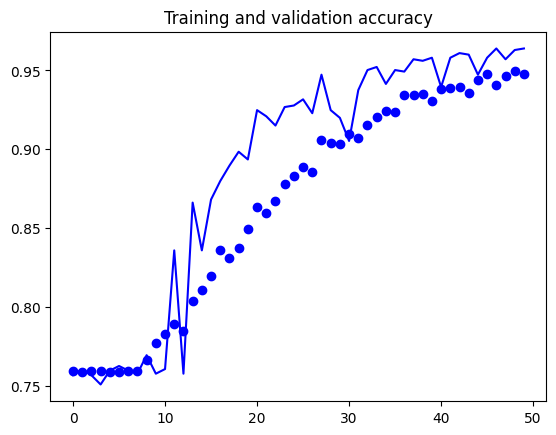

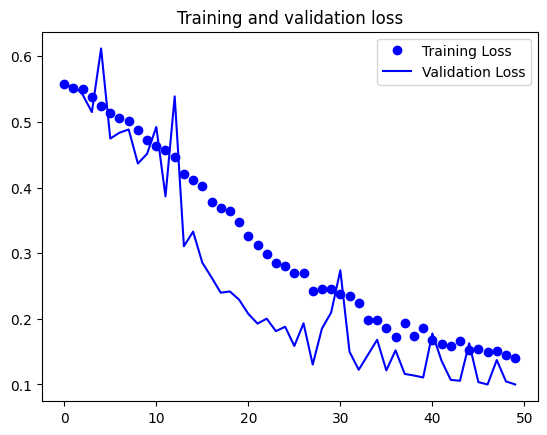

In [6]:
# Plot the results of training with data augmentation
plot_loss_acc(history)